In [6]:
%pylab inline
import sys, os

Populating the interactive namespace from numpy and matplotlib


In [7]:
nb_directory = os.getcwd()
print(nb_directory)
sys.path.insert(0, os.path.join(nb_directory, '..'))



/Users/mariannejbr/Dropbox/Cosmology/f-r-chi2/codigo-f_R/notebooks


In [2]:
class FancyFormatter(Formatter):
    """Formater for values with LaTeX fonts."""

    def __call__(self, v, pos=None):
        return r'${:.5G}$'.format(v)

    def format_data_short(self, value):
        return '{:.1f}'.format(value)

In [103]:
    dark_pink = '#800080'
    light_pink = '#FFB3FF'

    dark_blue = '#003366'
    light_blue = '#99CCFF'

    dark_orange = '#FF8000'
    light_orange = '#FFBF80'

    dark_green = '#208000'
    light_green = '#C6FFB3'

    dark_red = '#CC0000'
    light_red = '#DEA6A6'
    
    othergreen = '#3DDC97'
    othergreen2 = '#20BF55'
    
    blue_1= '#1179BF'
    blue_2 = '#100B40'
    blue_3 = '#3F2CFF'
    
    blue_4= '#3021BF'
    
    bluegray='#4B84BF'
    
    ladrillo_1 = '#BF6672'
    ladrillo_2 ='#402226'
    ladrillo_3='#7F444C'
    
    
    red_1='#BF413F'
    red_2='#E54E4C'
    red_3='#401615'

## BFV for GEoS

In [57]:
#fileBAO = './../Output/BFV/BAO/BAO-f_R_4params-20171104-165447.txt'
fileBAO = './../Output/BFV/BAO/BAO-6params-20171116-120539.txt'
#fileTotal= './../Output/BFV/Total/TOTAL-6params-20171104-163023.txt'
fileTotal = './../Output/BFV/Total/Total-fR-Union21-20180117-211117.txt'
#fileSNe = './../Output/BFV/SNe/SNe-fR-4params-20171104-165049.txt'
fileSNe = './../Output/BFV/SNe/SNe_Union2_1-6params-20171114-191728.txt'
#fileHz = './../Output/BFV/Hz/Hz-f_R-4params-20171104-164907.txt'
fileHz = './../Output/BFV/Hz/Hz_6params-20171116-202854.txt'

bfvB = np.loadtxt(fileBAO)
bfvS = np.loadtxt(fileSNe)
bfvH = np.loadtxt(fileHz)
bfvT = np.loadtxt(fileTotal)

[wtodayb, chi2minb, chi2redb, w0b, w1b, w2b, w3b, h, om, bic, aic, mparams] = bfvB
[wtodays, chi2mins, chi2reds, w0s, w1s, w2s, w3s, h, om] = bfvS
[wtodayh, chi2minh, chi2redh, w0h, w1h, w2h, w3h, h, om] = bfvH
[wtodayt, chi2mint, chi2redt, w0t, w1t, w2t, w3t, h, om, bic, aic, mparams] = bfvT

(chi2minb, chi2mins, chi2minh, chi2mint)
#(chi2redb,chi2reds,chi2redh,chi2redt)
sigmageom = np.array(7.038)

In [58]:
chi2distances_geom = (chi2mint-chi2minb,
                    chi2mint-chi2mins,
                    chi2mint-chi2minh)
chi2distances_geom/sigmageom

array([ 79.874561  ,   4.11178514,  78.96852238])

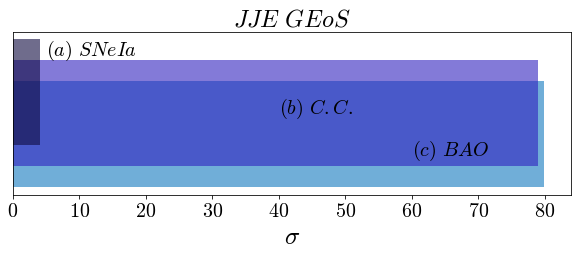

In [90]:
figure(figsize=(10, 3))


dpi = 300

rcParams['font.size'] = 20
rcParams['lines.linewidth'] = 2
rcParams['mathtext.fontset'] = 'cm'

cax = gca()
data = ('SNe','CC','BAO')
y_pos = 0.2 *np.arange(len(data))

#sigmadistancesLCDM = [4.11178514,   78.96852238,  79.874561]
sigmadistancesGEOM = [79.874561,  78.96852238, 4.11178514]
mycolors = [red_1,red_2,red_3]
othercolors = [blue_1,blue_4, blue_2]

for yb, sig, col in zip(y_pos, sigmadistancesGEOM,othercolors):
    barh(yb, sig, 1, alpha=0.6,color=col, align='edge')

#gca().xaxis.set_ticks_position('bottom')
setp(gca().get_xticklabels(),fontsize=20)

yticks([])
text(5, 1.25, s=r'$(a)$ $SNeIa$', fontsize=20)
text(40, 0.7, s=r'$(b)$ $C.C.$', fontsize=20)
text(60, 0.3, s=r'$(c)$ $BAO$', fontsize=20)


#locator = MultipleLocator(0.3)
#min_locator = MultipleLocator(0.15)
cax.xaxis.set_major_formatter(FancyFormatter())
#xlim(xmax=2.1)
#cax.xaxis.set_major_locator(locator)
#cax.xaxis.set_minor_locator(min_locator)
xlabel(r'$\sigma$', fontsize=25)
title('$JJE$ $GEoS$')
#ylabel(r'$\sigma$ $distance$')

#savefig('./../../../../f_R-Chi2/code-chi2-bao-sneia-shared/figures/tension-sigmaunits-JJE.pdf', bbox_inches='tight')



## BFV for CPL

In [54]:
fileBAOcpl = './../Output/BFV/BAO/BAO-CPL-20171205-163029.txt'
fileTotalcpl= './../Output/BFV/Total/Total-CPL-Union21-20180117-200333.txt'
fileSNecpl = './../Output/BFV/SNe/SNe_Union21-CPL-20171206-004449.txt'
fileHzcpl = './../Output/BFV/Hz/Hz-CPL-20171206-004007.txt'

bfvBc = np.loadtxt(fileBAOcpl)
bfvSc = np.loadtxt(fileSNecpl)
bfvHc = np.loadtxt(fileHzcpl)
bfvTc = np.loadtxt(fileTotalcpl)

[wtodaycpl, chi2mincplb, chi2redcplb, w0cpl, w1cpl, hcpl, omcpl,bic, aic, mparams] = bfvBc
[wtodaycpl, chi2mincpls, chi2redcpls, w0cpl, w1cpl, hcpl, omcpl,bic, aic, mparams] = bfvSc
[wtodaycpl, chi2mincplc, chi2redcplc, w0cpl, w1cpl, hcpl, omcpl,bic, aic, mparams] = bfvHc
[wtodaycpl, chi2mincplt, chi2redcplt, w0cpl, w1cpl, hcpl, omcpl,bic, aic, mparams] = bfvTc

(chi2mincplb, chi2mincpls, chi2mincplc, chi2mincplt)
#(chi2redcplb, chi2redcpls, chi2redcplc, chi2redcplt)
sigmabidim = np.array(4.72)

In [55]:
chi2distances_cpl = (chi2mincplt-chi2mincplb,
                    chi2mincplt-chi2mincpls,
                    chi2mincplt-chi2mincplc)
chi2distances_cpl/sigmabidim

array([ 119.17515843,    6.32469762,  117.85017423])

In [95]:
figure(figsize=(10, 3))


dpi = 300

rcParams['font.size'] = 20
rcParams['lines.linewidth'] = 2
rcParams['mathtext.fontset'] = 'cm'

cax = gca()
data = ('SNe','CC','BAO')
y_pos = 0.2 *np.arange(len(data))

#sigmadistancesCPL = [6.32469762,   117.85017423,  119.17515843]
sigmadistancesCPL = [119.17515843,  117.85017423, 6.32469762]

mycolors = [red_1,red_2,red_3]
othercolors = [blue_1,blue_4, blue_2]
morecolors = [dark_red,  dark_pink,light_red]


for yb, sig, col in zip(y_pos, sigmadistancesCPL, morecolors):
    barh(yb, sig, 1, alpha=0.6,color=col, align='edge')

#gca().xaxis.set_ticks_position('bottom')
setp(gca().get_xticklabels(),fontsize=20)

yticks([])
text(7, 1.25, s=r'$(a)$ $SNeIa$', fontsize=20)
text(50, 0.7, s=r'$(b)$ $C.C.$', fontsize=20)
text(80, 0.3, s=r'$(c)$ $BAO$', fontsize=20)


#locator = MultipleLocator(0.3)
#min_locator = MultipleLocator(0.15)
cax.xaxis.set_major_formatter(FancyFormatter())
#xlim(xmax=2.1)
#cax.xaxis.set_major_locator(locator)
#cax.xaxis.set_minor_locator(min_locator)
xlabel(r'$\sigma$', fontsize=25)
title('$CPL$')
#ylabel(r'$\sigma$ $distance$')

#savefig('./../../../../f_R-Chi2/code-chi2-bao-sneia-shared/figures/tension-sigmaunits-CPL.pdf', bbox_inches='tight')



## BFV for BA

In [52]:
fileBAOba = './../Output/BFV/BAO/BAO-BA-20171205-235931.txt'
fileTotalba= './../Output/BFV/Total/Total-BA-Union21-20180117-204135.txt'
fileSNeba = './../Output/BFV/SNe/SNe-Union-BA-20171206-000534.txt'
fileHzba = './../Output/BFV/Hz/Hz-BA-20171206-003856.txt'

bfvBba = np.loadtxt(fileBAOba)
bfvSba = np.loadtxt(fileSNeba)
bfvHba = np.loadtxt(fileHzba)
bfvTba = np.loadtxt(fileTotalba)

[wtodayba, chi2minbab, chi2redbab, w0ba, w1ba, hba, omba, bic, aic, mparams] = bfvBba
[wtodayba, chi2minbas, chi2redbas, w0ba, w1ba, hba, omba, bic, aic, mparams] = bfvSba
[wtodayba, chi2minbac, chi2redbac, w0ba, w1ba, hba, omba, bic, aic, mparams] = bfvHba
[wtodayba, chi2minbat, chi2redbat, w0ba, w1ba, hba, omba, bic, aic, mparams] = bfvTba

(chi2minbab, chi2minbas, chi2minbac, chi2minbat)
#(chi2redbab,chi2redbas,chi2redbac,chi2redbat)
sigmabidim = np.array(4.72)

In [53]:
chi2distances_ba = (chi2minbat-chi2minbab,
                    chi2minbat-chi2minbas,
                    chi2minbat-chi2minbac)
chi2distances_ba/sigmabidim

array([ 119.13574032,    6.30238355,  117.86698689])

In [113]:
figure(figsize=(10, 3))


dpi = 300

rcParams['font.size'] = 20
rcParams['lines.linewidth'] = 2
rcParams['mathtext.fontset'] = 'cm'

cax = gca()
data = ('SNe','CC','BAO')
y_pos = 0.2 *np.arange(len(data))

#sigmadistancesBA = [6.30238355,   117.86698689,  119.13574032]
sigmadistancesBA = [119.13574032,  117.86698689, 6.30238355]
mycolors = [red_1,red_2,red_3]
othercolors = [blue_1,blue_4, blue_2]
evenmorecolors = [othergreen2,  dark_green, othergreen]


for yb, sig, col in zip(y_pos, sigmadistancesBA,evenmorecolors):
    barh(yb, sig, 1, alpha=0.6,color=col, align='edge')

#gca().xaxis.set_ticks_position('bottom')
setp(gca().get_xticklabels(),fontsize=20)

yticks([])
text(8, 1.25, s=r'$(a)$ $SNeIa$', fontsize=20)
text(60, 0.9, s=r'$(b)$ $C.C.$', fontsize=20)
text(107, 0.12, s=r'$(c)$ $BAO$', fontsize=20)


#locator = MultipleLocator(0.3)
#min_locator = MultipleLocator(0.15)
cax.xaxis.set_major_formatter(FancyFormatter())
#xlim(xmax=2.1)
#cax.xaxis.set_major_locator(locator)
#cax.xaxis.set_minor_locator(min_locator)
xlabel(r'$\sigma$', fontsize=25)
title('$BA$')
#ylabel(r'$\sigma$ $distance$')

#savefig('./../../../../f_R-Chi2/code-chi2-bao-sneia-shared/figures/tension-BA.pdf', bbox_inches='tight')



## BFV for LCDM

In [50]:
fileBAOlcdm = './../Output/BFV/BAO/BAO-LCDM-20171204-124557.txt'
fileTotallcdm= './../Output/BFV/Total/Total-LCDM-Union21-20171204-132007.txt'
fileSNelcdm = './../Output/BFV/SNe/SNe_Union21-LCDM-20171204-124739.txt'
fileHzlcdm = './../Output/BFV/Hz/Hz_LCDM-20171204-130334.txt'

bfvBlcdm = np.loadtxt(fileBAOlcdm)
bfvSlcdm = np.loadtxt(fileSNelcdm)
bfvHlcdm = np.loadtxt(fileHzlcdm)
bfvTlcdm = np.loadtxt(fileTotallcdm)

[wtoday, chi2minlcdmbao, chi2redlcdmbao, w0, w1, w2, w3, h, om, bic, aic, mparams] = bfvBlcdm
[wtoday, chi2minlcdmsne, chi2redlcdmsne, w0, w1, w2, w3, h, om, bic, aic, mparams] = bfvSlcdm
[wtoday, chi2minlcdmcc, chi2redlcdmcc, w0, w1, w2, w3, h, om, bic, aic, mparams] = bfvHlcdm
[wtoday, chi2minlcdmTot, chi2redlcdmTot, w0, w1, w2, w3, h, om, bic, aic, mparams] = bfvTlcdm

(chi2minlcdmbao,chi2minlcdmsne,chi2minlcdmcc,chi2minlcdmTot)
#(chi2redlcdmbao,chi2redlcdmsne,chi2redlcdmcc,chi2redlcdmTot)

sigma1cdm =np.array(2.295)

In [51]:
chi2distances_lcdm = (chi2minlcdmTot-chi2minlcdmbao,
                      chi2minlcdmTot-chi2minlcdmsne,
                      chi2minlcdmTot-chi2minlcdmcc)
chi2distances_lcdm/sigma1cdm

array([ 245.35861869,   13.12061033,  242.44602483])

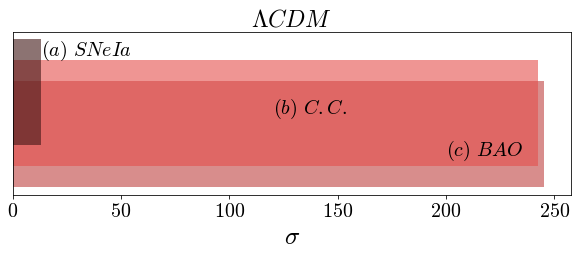

In [88]:
figure(figsize=(10, 3))


dpi = 300

rcParams['font.size'] = 20
rcParams['lines.linewidth'] = 2
rcParams['mathtext.fontset'] = 'cm'

cax = gca()
data = ('SNe','CC','BAO')
y_pos = 0.2 *np.arange(len(data))

#sigmadistancesLCDM = [13.12061033,   242.44602483,  245.35861869]
sigmadistancesLCDM = [245.35861869,  242.44602483, 13.12061033]
mycolors = [red_1,red_2,red_3]
othercolors = [blue_1,blue_4, blue_2]

for yb, sig, col in zip(y_pos, sigmadistancesLCDM,mycolors):
    barh(yb, sig, 1, alpha=0.6,color=col, align='edge')

#gca().xaxis.set_ticks_position('bottom')
setp(gca().get_xticklabels(),fontsize=20)

yticks([])
text(13, 1.25, s=r'$(a)$ $SNeIa$', fontsize=20)
text(120, 0.7, s=r'$(b)$ $C.C.$', fontsize=20)
text(200, 0.3, s=r'$(c)$ $BAO$', fontsize=20)


#locator = MultipleLocator(0.3)
#min_locator = MultipleLocator(0.15)
cax.xaxis.set_major_formatter(FancyFormatter())
#xlim(xmax=2.1)
#cax.xaxis.set_major_locator(locator)
#cax.xaxis.set_minor_locator(min_locator)
xlabel(r'$\sigma$', fontsize=25)
title('$\Lambda CDM$')
#ylabel(r'$\sigma$ $distance$')

#savefig('./../../../../f_R-Chi2/code-chi2-bao-sneia-shared/figures/tension-sigmaunits-lcdm.pdf', bbox_inches='tight')

